In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
AlexNet().layer_summary((1, 1, 224, 224))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [ ]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

Training Time: 528.47 seconds
Training Accuracy: 0.8475


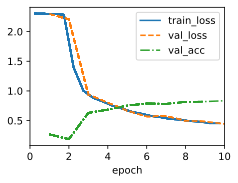

In [ ]:
import torch
from torch.utils.data import DataLoader
from d2l import torch as d2l

# Code for calculating training time
import time

model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)

# Train the model and calculate training time
start_time = time.time()
trainer.fit(model, data)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Calculate training accuracy
def calculate_training_accuracy(model, data_loader):
    model.eval()
    num_correct = 0
    num_examples = 0
    with torch.no_grad():
        for X, y in data_loader:
            X, y = X.cuda(), y.cuda()
            y_pred = model(X)
            num_correct += (torch.argmax(y_pred, axis=1) == y).sum().item()
            num_examples += X.shape[0]
    return num_correct / num_examples

# Get the training accuracy
accuracy = calculate_training_accuracy(model, data.train_dataloader())
print(f"Training Accuracy: {accuracy:.4f}")




In [ ]:
class SimplifiedAlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(64, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

model = SimplifiedAlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(32, 32))  # Resizing images to 32x32 for faster training
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ceb31e337f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ceb31e337f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Accuracy on FashionMNIST: 0.8532166666666666
Training time: 137.7828130722046 seconds


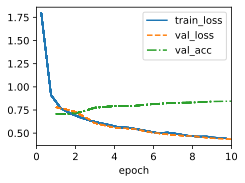

In [ ]:
import torch
from torch.utils.data import DataLoader
from d2l import torch as d2l

def evaluate_accuracy(model, data_loader):
    model.eval()  # Switch to evaluation mode
    num_correct = 0
    num_examples = 0
    with torch.no_grad():
        for X, y in data_loader:
            X, y = X.cuda(), y.cuda()  # Moving data to GPU
            y_hat = model(X)
            num_correct += (torch.argmax(y_hat, axis=1) == y).sum().item()
            num_examples += X.shape[0]
    model.train()  # Switch back to training mode
    return num_correct / num_examples

# Assuming model is defined as in your code
model = SimplifiedAlexNet(lr=0.01)
model.cuda()  # Move model to GPU
data = d2l.FashionMNIST(batch_size=128, resize=(32, 32))  # Same data configuration used for training

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
start_time = time.time()  # Record starting time
trainer.fit(model, data)
end_time = time.time()  # Record ending time

# Evaluate accuracy after training
data_loader = data.train_dataloader()
accuracy = evaluate_accuracy(model.net, data_loader)
print("Accuracy on FashionMNIST:", accuracy)
print("Training time:", end_time - start_time, "seconds")


In [ ]:
class ModifiedAlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1), nn.ReLU(),
            nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), nn.Flatten(),
            nn.Linear(256 * 3 * 3, 4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.Linear(4096, num_classes))
        self.net.apply(d2l.init_cnn)

ModifiedAlexNet().layer_summary((1, 1, 28, 28))

model = ModifiedAlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(28, 28))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)


Accuracy on FashionMNIST: 0.8461833333333333
Training time: 161.29619193077087 seconds


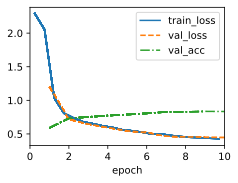

In [ ]:
import torch
import time
from torch.utils.data import DataLoader
from d2l import torch as d2l

def evaluate_accuracy(model, data_loader):
    model.eval()  # Switch to evaluation mode
    num_correct = 0
    num_examples = 0
    with torch.no_grad():
        for X, y in data_loader:
            X, y = X.cuda(), y.cuda()  # Moving data to GPU
            y_hat = model(X)
            num_correct += (torch.argmax(y_hat, axis=1) == y).sum().item()
            num_examples += X.shape[0]
    model.train()  # Switch back to training mode
    return num_correct / num_examples

# Assuming model is defined as in your code
model = ModifiedAlexNet(lr=0.01)
model.cuda()  # Move model to GPU
data = d2l.FashionMNIST(batch_size=128, resize=(28, 28))  # Same data configuration used for training

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
start_time = time.time()  # Record starting time
trainer.fit(model, data)
end_time = time.time()  # Record ending time

# Evaluate accuracy after training
data_loader = data.train_dataloader()
accuracy = evaluate_accuracy(model.net, data_loader)
print("Accuracy on FashionMNIST:", accuracy)
print("Training time:", end_time - start_time, "seconds")
